In [4]:
import pandas as pd
import plotly.express as px
import sys
import os
import re
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS,WordCloud




In [9]:
df = pd.read_csv(os.path.abspath(os.path.join('../'))+"/data/cleaned_tweet_data.csv")

### Display some of the data

In [10]:
df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.540000,en,188.0,43.0,davideiacovozzi,18,18,NaN,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",NaN
1,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,NaN,0.175000,en,NaN,NaN,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",NaN
2,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0.00,0.000000,en,193.0,26.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",NaN
3,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0.00,0.183333,en,620.0,213.0,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",NaN
4,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.40,0.400000,en,1787.0,417.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",NaN


In [11]:
df.columns

Index(['created_at', 'source', 'original_text', 'polarity', 'subjectivity',
       'lang', 'favorite_count', 'retweet_count', 'original_author',
       'followers_count', 'friends_count', 'possibly_sensitive', 'hashtags',
       'user_mentions', 'place'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16367 entries, 0 to 16366
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          16367 non-null  object 
 1   source              16367 non-null  object 
 2   original_text       16367 non-null  object 
 3   polarity            14515 non-null  float64
 4   subjectivity        16367 non-null  float64
 5   lang                16367 non-null  object 
 6   favorite_count      14515 non-null  float64
 7   retweet_count       14515 non-null  float64
 8   original_author     16367 non-null  object 
 9   followers_count     16367 non-null  int64  
 10  friends_count       16367 non-null  int64  
 11  possibly_sensitive  6168 non-null   object 
 12  hashtags            16367 non-null  object 
 13  user_mentions       16367 non-null  object 
 14  place               10664 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 1.9+

In [13]:
df.describe()

,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,14515.000000,16367.000000,1.451500e+04,14515.000000,1.636700e+04,1.636700e+04
mean,0.090043,0.314242,3.359129e+03,656.043817,5.361675e+04,5.361675e+04
std,0.279109,0.316608,3.523459e+04,7508.335845,4.329542e+05,4.329542e+05
min,-1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000e+00,0.000000,1.120000e+02,1.120000e+02
50%,0.000000,0.288889,0.000000e+00,0.000000,5.430000e+02,5.430000e+02
75%,0.200000,0.529461,1.005000e+02,28.000000,2.131000e+03,2.131000e+03
max,1.000000,1.000000,1.339072e+06,434379.000000,6.027402e+06,6.027402e+06


### Clean original text column

In [14]:
df.loc[2,"original_text"]

'RT @goldseek: When? https://t.co/kO2FfHKaZg'

In [15]:
df_copy

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",The 10-year yield is telling us that there's ...,0.16,0.540000,en,188.0,43.0,davideiacovozzi,18,18,NaN,"[{'text': 'gold', 'indices': [116, 121]}, {'te...","[{'screen_name': 'NorthstarCharts', 'name': 'N...",NaN
1,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...","German 10y mortgage rate went from 0,8% to 2,...",NaN,0.175000,en,NaN,NaN,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'MichaelAArouet', 'name': 'Mi...",NaN
2,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",When?,0.00,0.000000,en,193.0,26.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'goldseek', 'name': 'Peter ⚒ ...",NaN
3,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",The 30-year mortgage rate in the US rises to ...,0.00,0.183333,en,620.0,213.0,davideiacovozzi,18,18,NaN,[],"[{'screen_name': 'charliebilello', 'name': 'Ch...",NaN
4,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",Rates rise until something breaks is anythin...,-0.40,0.400000,en,1787.0,417.0,davideiacovozzi,18,18,False,[],"[{'screen_name': 'biancoresearch', 'name': 'Ji...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16362,2022-04-22 15:22:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Best wishes &amp; heartfelt congratulations t...,0.50,0.729630,en,2924.0,300.0,kitukalesatya,706,706,NaN,[],"[{'screen_name': 'CHARANJITCHANNI', 'name': 'C...",NaN
16363,2022-04-22 15:22:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @BajpayeeManoj for this beautiful m...,0.85,1.000000,en,14671.0,5006.0,kitukalesatya,706,706,NaN,[],"[{'screen_name': 'pbhushan1', 'name': 'Prashan...",NaN
16364,2022-04-22 15:01:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Agree ?,NaN,0.000000,en,NaN,NaN,kitukalesatya,706,706,False,[],"[{'screen_name': 's_shreyatweets', 'name': 'Sh...",NaN
16365,2022-04-22 14:58:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",1. Peace Yatra by Late Sunil Dutt from Mumbai...,NaN,0.600000,en,NaN,NaN,kitukalesatya,706,706,False,[],"[{'screen_name': 'tejjINC', 'name': 'तेजस | Te...",NaN


In [16]:
df_copy = df.copy()
df_copy["original_text"] = df_copy["original_text"].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df_copy["original_text"] = df_copy["original_text"].apply(lambda x: ("").join(x.split(":")[1:]))
df_copy["original_text"] = df_copy["original_text"].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
df_copy.loc[10,"original_text"]

' Annual mortgage payments in the US are now 35% higher than at the peak of the 2006 bubble '

In [17]:
df_copy["original_text"]

0         The 10-year yield is telling us that there's ...
1         German 10y mortgage rate went from 0,8% to 2,...
2                                                   When? 
3         The 30-year mortgage rate in the US rises to ...
4         Rates rise until something breaks  is anythin...
                               ...                        
16362     Best wishes &amp; heartfelt congratulations t...
16363     Thank you @BajpayeeManoj for this beautiful m...
16364                                             Agree ? 
16365     1. Peace Yatra by Late Sunil Dutt from Mumbai...
16366     Gujarat Congress MLA arrested for a tweet - N...
Name: original_text, Length: 16367, dtype: object

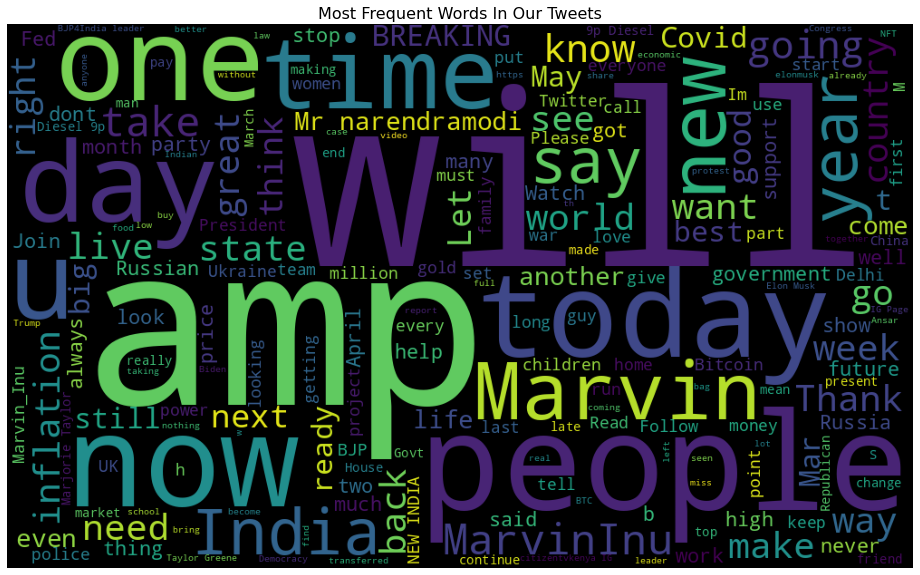

In [18]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(df_copy.original_text.values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets related to economy',fontsize=16)
plt.show()

In [20]:
df_copy[df_copy["original_author"].apply(lambda x: "marvin" in x)]

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
10605,2022-04-22 18:22:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",$Marvin all the way any day anytime \n\n#1000...,0.000000,0.000000,en,15.0,14.0,Richie_marvin67,636,636,False,"[{'text': '1000Xgems', 'indices': [54, 64]}, {...","[{'screen_name': 'dapps_s', 'name': 'dapps$', ...",NaN
10606,2022-04-22 18:21:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...","With #MarvinInu in your wallet, you can close...",0.500000,0.500000,en,14.0,9.0,Richie_marvin67,636,636,NaN,"[{'text': 'MarvinInu', 'indices': [26, 36]}]","[{'screen_name': 'PeterMcClendon5', 'name': 'P...",NaN
10607,2022-04-22 18:21:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Let move to the mars together\nRocket to the ...,0.000000,0.000000,en,20.0,17.0,Richie_marvin67,636,636,NaN,"[{'text': 'marvinInu', 'indices': [94, 104]}]","[{'screen_name': 'Herritage01', 'name': 'Herri...",NaN
10608,2022-04-22 18:21:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",It's going to be Epic\n\n#Btok ads starting t...,0.250000,0.300000,en,9.0,6.0,Richie_marvin67,636,636,NaN,"[{'text': 'Btok', 'indices': [44, 49]}, {'text...","[{'screen_name': 'Head_world97', 'name': 'Head...",NaN
10609,2022-04-22 18:20:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",It's a great time to be a #Marvin holder\n\nD...,0.800000,0.750000,en,11.0,8.0,Richie_marvin67,636,636,NaN,"[{'text': 'Marvin', 'indices': [44, 51]}, {'te...","[{'screen_name': 'Head_world97', 'name': 'Head...",NaN
10610,2022-04-22 18:20:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",,0.000000,0.000000,en,0.0,0.0,Richie_marvin67,636,636,False,"[{'text': 'marvin', 'indices': [90, 97]}]",[],NaN
10611,2022-04-22 18:08:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",With $marvin in your wallet you can get the f...,0.000000,0.000000,en,2.0,2.0,Richie_marvin67,636,636,NaN,[],"[{'screen_name': 'Hadexdav', 'name': 'Hadexdav...",NaN
10612,2022-04-22 18:08:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",#MarvinInu topping the chart with one of the ...,0.041667,0.066667,en,9.0,9.0,Richie_marvin67,636,636,NaN,"[{'text': 'MarvinInu', 'indices': [20, 30]}]","[{'screen_name': 'Arnold_Donelly', 'name': 'Ar...",NaN
10613,2022-04-22 18:06:21+00:00,"<a href=""http://twitter.com/download/iphone"" r...",\n(1) Portfolio analytics &amp; charting\n(2) ...,-0.750000,1.000000,en,0.0,0.0,Richie_marvin67,636,636,False,[],[],NaN
10614,2022-04-22 18:00:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Who is ready for the mars , u can join on @Ma...",NaN,0.450000,en,NaN,NaN,Richie_marvin67,636,636,NaN,"[{'text': 'marvin', 'indices': [90, 97]}]","[{'screen_name': 'Herritage01', 'name': 'Herri...",NaN
